# Manipulation avec Pandas

## Import des librairies

In [89]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sc

In [66]:
customers=pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [67]:
products=pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [68]:
transactions=pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [69]:
data_inter=customers.merge(transactions)
data_inter

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715
...,...,...,...,...,...,...
337011,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337
337012,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701
337013,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960
337014,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845


In [70]:
data = data_inter.merge(products)
data['age'] = 2022 - data.birth
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


In [71]:
data = data.drop(data[data.price < 0].index)
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


In [72]:
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


## Travail à faire

# Créer le dataset par client

| id_client | Age | Sexe | *Montant | *Fréquence | *Panier Moyen | *Tranche d'Age | *Montant catégorie 0 | *Montant catég 1 | *Montant catég 2 | *Récence |
|:---------:|-----|------|----------|------------|---------------|----------------|----------------------|------------------|------------------|---------|
|           |     |      |          |            |               |                |                      |                  |                  |         |
|           |     |      |          |            |               |                |                      |                  |                  |         |

Les colonnes précédées d'un "*" sont les nouvelles colonnes à calculer.  
Montant : montant dépensé total des achats sur la période  
Fréquence : nombre d'achat sur la période
Récence : nombre de jour depuis le dernier achat (Attention, partir du max(Date) du dataset !)
  
Vous devez avoir à la fin, une ligne par client.  

**Fonctions nécessaires :**  
 - [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
 - [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) (+ reset_index() )
 

# Panier moyen / Fréquence / Montant

In [147]:
#dataframe avec valeurs montant total des achats par client, fréquence et panier moyen
mydf=data.groupby(['client_id','age','sex']).agg(Montant=pd.NamedAgg(column='price', aggfunc=sum), Fréquence=pd.NamedAgg(column='price', aggfunc='count'),Panier=pd.NamedAgg(column='price', aggfunc='mean')).reset_index()


# Catégorie

In [154]:
cat= data.groupby(['client_id','categ']).sum().reset_index()

In [153]:
#pivot sur les 3 catégories
pivot = cat.pivot_table(index='client_id', columns= 'categ', values= 'price',fill_value=0)

# Tranche d'âge

18-25 / 26-35 / 36-50 / 50 et +

In [20]:
#âge minimum dans le dataset
data['age'].min()

18

In [124]:
#tranche d'âge
tranche = data.groupby(data.client_id).max().reset_index()
tranche['tranche'] = pd.cut(x=tranche['age'], bins=[18,30,50,70,100])

# Recense

In [126]:
#date max dans le dataset
data['date'].max()

'2022-02-28 23:59:58.040472'

In [127]:
#import bibliothèque
from datetime import datetime

In [183]:
#recense
data['date'] = data['date'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"
a = data['date']
b = max(data['date'])
data['recence'] = b-a
data['recence'] = data['recence'].astype('timedelta64[D]')

# Jointures

In [184]:
mydata30 = data.groupby('client_id').min()

In [185]:
df_merge1 = pd.merge(mydf, pivot, left_on='client_id', right_on='client_id')

In [186]:
df_merge2 = pd.merge(df_merge1, mydata30, left_on='client_id', right_on='client_id')

In [187]:
df_merge3 = pd.merge(df_merge2, tranche, left_on='client_id', right_on='client_id')

In [188]:
df_merge4 = df_merge3.drop(['sex_y', 'sex_x','age_x', 'birth_y', 'id_prod_y', 'date_y', 'session_id_y', 'age_y', 'categ_y', 'price_y', 'birth_x', 'id_prod_x', 'date_x', 'session_id_x', 'price_x', 'categ_x'], axis = 1)

In [189]:
# renommer colonnes
df_merge4.columns = ['id_client', 'Montant', 'Fréquence', 'Panier Moyen', "Montant catég 0", 'Montant catég 1', 'Montant catég 2', 'Recence', 'Sexe', 'Age', 'Tranche age'] 

# Lecture CSV

In [169]:
#lecture CSV du tableau de Marianne
dataset = pd.read_csv('dataset.csv')

### Centrer/Réduire les données

Petite veille sur le sujet avant de se lancer : https://mrmint.fr/data-preprocessing-feature-scaling-python   
Mais n'oubliez pas de faire aussi vos propres recherches.

Créer le dataset avec les données centrées et réduites.

In [3]:
#import des bibliothèques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Dataset avec données centrées et réduites

In [4]:
#dataset avec uniquement les valeurs numériques
dataset2= pd.DataFrame(dataset, columns =['age', 'montant', 'frequence','panier_moyen', 'montant_categ_0', 'montant_categ_1', 'montant_categ_2', 'recence'])

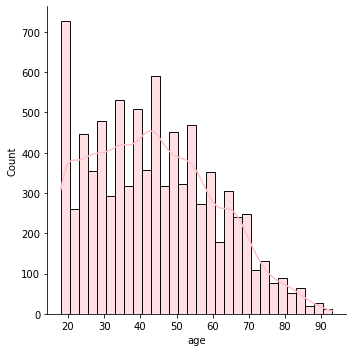

In [5]:
#displot valeur âge
sns.displot(dataset2['age'], kde=True, color='pink')

In [6]:
#array et reshape valeur âge
age_scaler=np.array(dataset2['age'])
age_scaler=age_scaler.reshape(8600, 1)

In [116]:
#scaler StandardScaler valeur âge
scaler = StandardScaler()
scaler_standard = scaler.fit_transform(age_scaler)

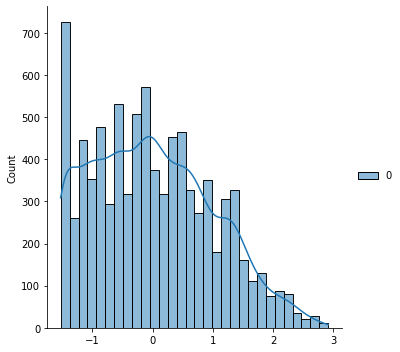

In [8]:
#displot valeur âge StandardScaler
sns.displot(scaler_standard, kde=True)

In [115]:
#scaler MinMaxScaler valeur âge
scaler = MinMaxScaler()
scaler_minmax = scaler.fit_transform(age_scaler)

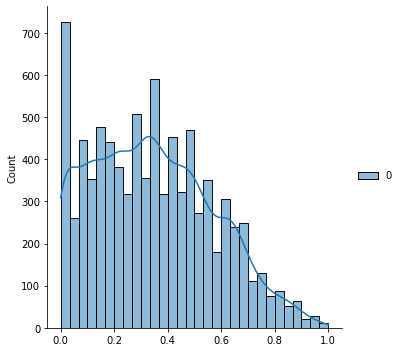

In [10]:
#displot valeur âge MinMaxScaler
sns.displot(scaler_minmax, kde=True)

In [114]:
#scaler dataset2
scaler=StandardScaler()
scaler_dataset2=scaler.fit_transform(dataset2)

In [12]:
#convertir scaler_dataset2 en dataframe
dataset_heatmap = pd.DataFrame(scaler_dataset2, columns =['age', 'montant', 'frequence','panier_moyen', 'montant_categ_0', 'montant_categ_1', 'montant_categ_2', 'recence'])

# Matrice de corrélation

Comment sont calculés les coefficients ? Par quelle méthode ? Qu'est-ce que signifie une corrélation positive/négative ? 

Pour vous aiguillez avec Python : https://www.delftstack.com/fr/howto/python-pandas/pandas-correlation-matrix/

<AxesSubplot:>

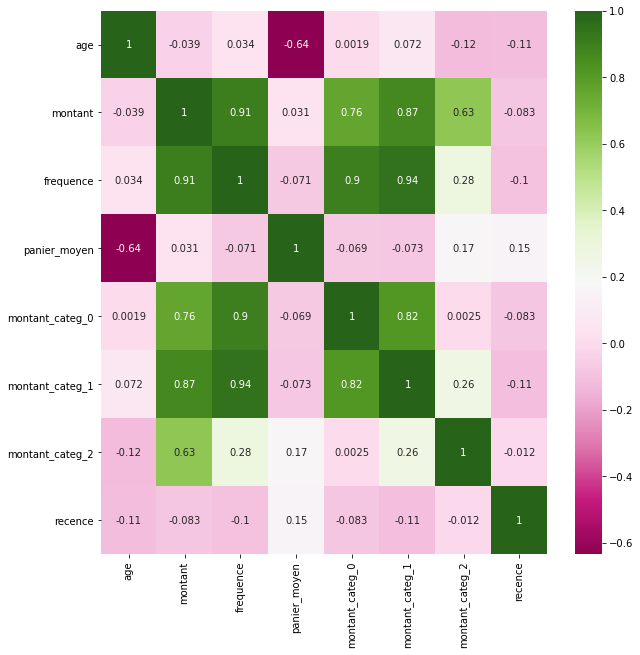

In [13]:
#Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(dataset_heatmap.corr(),annot= True, cbar = True, cmap="PiYG")

# Réduire le dataset

In [168]:
#drop les colonnes fréquence et montant_categ_0
dataset_drop = dataset_heatmap.drop(['frequence','montant_categ_1'], axis=1)

# Elbow chart

In [122]:
#import des bibliothèques
from sklearn import datasets
from sklearn.preprocessing import scale
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

In [41]:
#X est égale à mon dataset
X = dataset_drop

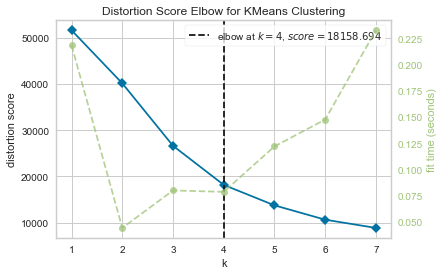

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
#visualisation 
KMeans(X)
visu= KElbowVisualizer(KMeans(X), k=(1,8))
visu.fit(X)
visu.show()

# Clustering

In [174]:
# kmeans / fit / predict (nombre de clusters : 4) / dataset avec colonne "clusters"
kmeans = KMeans(4)
dataset['clusters'] = kmeans.fit_predict(X)
dataset

,client_id,age,sex,montant,frequence,panier_moyen,tranche_age,montant_categ_0,montant_categ_1,montant_categ_2,recence,clusters
0,c_1,67,m,300.65,15,20.043333,"(50, 100]",174.20,71.58,54.87,27.0,0
1,c_10,66,m,586.18,16,36.636250,"(50, 100]",124.92,391.27,69.99,76.0,0
2,c_100,30,m,222.87,3,74.290000,"(25, 35]",31.38,52.96,138.53,202.0,3
3,c_1000,56,f,980.02,42,23.333810,"(50, 100]",169.85,810.17,0.00,0.0,0
4,c_1001,40,m,1102.45,24,45.935417,"(35, 50]",527.81,274.64,300.00,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,67,m,119.08,5,23.816000,"(50, 100]",55.34,63.74,0.00,116.0,0
8596,c_996,52,f,739.60,36,20.544444,"(50, 100]",204.70,534.90,0.00,22.0,0
8597,c_997,28,f,572.89,10,57.289000,"(25, 35]",84.86,158.92,329.11,54.0,3
8598,c_998,21,m,1527.69,13,117.514615,"(18, 25]",88.17,108.06,1331.46,5.0,3


In [175]:
dataset['clusters'].value_counts()

0    6227
3    2371
1       1
2       1
Name: clusters, dtype: int64

# Silhouette score

In [179]:
#calcul du silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, dataset['clusters'])

0.45801346543920385

# Visualisation

<AxesSubplot:xlabel='clusters', ylabel='montant'>

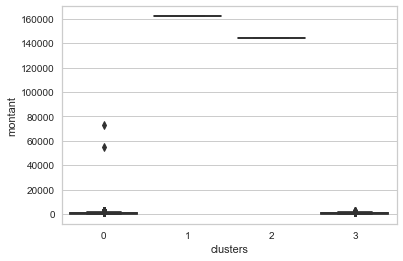

In [180]:
#visualisation sur le montant
visu_montant = sns.boxplot(x=dataset['clusters'], y=dataset['montant'])
visu_montant